In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential


In [2]:
import random
random.seed(2)
import tensorflow as tf 
tf.random.set_seed(2)
import numpy as np
np.random.seed(2)


In [4]:
bad_pizza_dataset = pd.DataFrame.from_dict({
    'tomato_sauce': ['no', 'no', 'yes', 'yes'],
    'barbecue_sauce': ['no', 'yes' ,'no','yes'],
    'result': ['sauce error', 'good' ,'good','sauce error']    
    
})

In [5]:
bad_pizza_dataset['c_tomato_sauce'] = bad_pizza_dataset['tomato_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_barbecue_sauce'] = bad_pizza_dataset['barbecue_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_result'] = bad_pizza_dataset['result'].apply(lambda x: 1 if x == 'sauce error' else 0)

In [6]:
bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result,c_tomato_sauce,c_barbecue_sauce,c_result
0,no,no,sauce error,0,0,1
1,no,yes,good,0,1,0
2,yes,no,good,1,0,0
3,yes,yes,sauce error,1,1,1


<AxesSubplot:xlabel='c_tomato_sauce', ylabel='c_barbecue_sauce'>

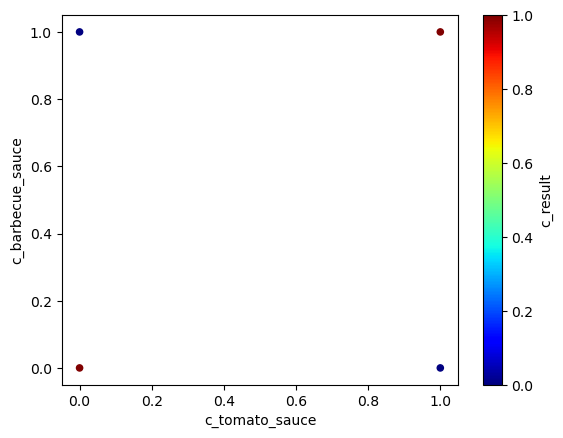

In [8]:
bad_pizza_dataset.plot(
    kind='scatter',
    x='c_tomato_sauce',
    y='c_barbecue_sauce',
    c='c_result',
    colormap='jet'
)

In [9]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')

output_layer = Dense(units=1, activation='sigmoid')

In [11]:
bad_pizza_model = Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)
sgd = SGD()
bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])